<b>Adı, Soyadı =</b>Abdullah Karakelle, Raşit Muhammed Pehlivan, Sena Nur Özdemir <br/>
<b>Numarası =</b>21040301025, 21040301015, 21040301013<br/>
<b>Ders =</b> Derin Öğrenme<br/>
<b>Proje =</b> Sahte Haber Tespiti Final Projesi<br/>
<b>Öğretim Görevlisi =</b> Cevat Rahebi<br/>
<b>Üniversitesi =</b> İstanbul Topkapı Üniversitesi<br/>
<b>Fakültesi =</b> Mühendislik Fakültesi<br/>
<b>Bölümü =</b> Yazılım Mühendisliği<br/>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Bidirectional
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
fake_file_path = r"C:\Users\senan\OneDrive\Masaüstü\derinFinalNew\Fake.csv"
true_file_path = r"C:\Users\senan\OneDrive\Masaüstü\derinFinalNew\True.csv"

df_fake = pd.read_csv(fake_file_path)
df_true = pd.read_csv(true_file_path)

df_fake["class"] = 0
df_true["class"] = 1

In [3]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [4]:
df_fake = df_fake.drop(["title", "subject","date"], axis = 1)
df_fake.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [5]:
df_true = df_true.drop(["title", "subject","date"], axis = 1)
df_true.head()

,text,class
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [6]:
df_fake.shape, df_true.shape

((23481, 2), (21417, 2))

In [7]:
df = pd.concat([df_fake, df_true], axis =0 )

In [8]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [9]:
df = df.sample(frac = 1)
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [10]:
df.head()

,text,class
0,JERUSALEM (Reuters) - Israeli Prime Minister B...,1
1,WASHINGTON (Reuters) - Some U.S. intelligence ...,1
2,The electoral map is being redrawn in Hillary ...,0
3,Federal prosecutors warned U.S. District Judge...,0
4,NEW YORK (Reuters) - Some rabbis and Jewish st...,1


In [11]:
df_fake_manual_test = df_fake.tail(20)
for i in range(23480,23460,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_test = df_true.tail(20)
for i in range(21416,21396,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [12]:
df_fake_manual_test.head(10)

,text,class
23461,KILLED: Rancher and protest spokesman Robert ...,0
23462,Tune in to the Alternate Current Radio Network...,0
23463,Patrick Henningsen 21st Century Wire UPDATE: 1...,0
23464,Episode #119 of SUNDAY WIRE SHOW finally resum...,0
23465,21st Century Wire says Various parties in Wash...,0
23466,21st Century Wire says For those who still ref...,0
23467,"21st Century Wire says So far, after nearly 20...",0
23468,21st Century Wire says If you ve been followin...,0
23469,Tune in to the Alternate Current Radio Network...,0
23470,RTOne of the most visible members of the armed...,0


In [13]:
df_true_manual_test.head(10)

,text,class
21397,BERLIN (Reuters) - The leader of Germany s Soc...,1
21398,SHANGHAI (Reuters) - An old review of an acade...,1
21399,DUBAI (Reuters) - A 14-year-old boy who was de...,1
21400,LONDON (Reuters) - Abdul Daoud spilt most of t...,1
21401,BUENOS AIRES (Reuters) - Argentina s main labo...,1
21402,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,1
21403,WASHINGTON (Reuters) - The United States sugge...,1
21404,WASHINGTON (Reuters) - The United States has d...,1
21405,ISLAMABAD (Reuters) - Outlining a new strategy...,1
21406,GENEVA (Reuters) - North Korea and the United ...,1


In [14]:
df_manual_test = pd.concat([df_fake_manual_test,df_true_manual_test], axis = 0)
df_manual_test.to_csv("manual_test.csv")

In [15]:
def wordopt(text):
    # Metni küçük harfe çevir
    text = text.lower()
    
    # Köşeli parantez içindeki ifadeleri kaldır
    text = re.sub(r'\[.*?\]', '', text)
    
    # Özel karakterleri boşlukla değiştir (kelime olmayan karakterler)
    text = re.sub(r'\W', ' ', text)
    
    # URL'leri kaldır
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # HTML etiketlerini kaldır
    text = re.sub(r'<.*?>+', '', text)
    
    # Noktalama işaretlerini kaldır
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    
    # Yeni satır karakterlerini kaldır
    text = re.sub(r'\n', '', text)
    
    # İçinde sayı bulunan kelimeleri kaldır
    text = re.sub(r'\w*\d\w*', '', text)
    
    return text

In [16]:
df["text"] = df["text"].apply(wordopt)

In [17]:
df.head()

,text,class
0,jerusalem reuters israeli prime minister b...,1
1,washington reuters some u s intelligence ...,1
2,the electoral map is being redrawn in hillary ...,0
3,federal prosecutors warned u s district judge...,0
4,new york reuters some rabbis and jewish st...,1


In [18]:
x = df["text"]
y = df["class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

LSTM

In [20]:
max_words = 10000  # Kullanılacak en fazla kelime sayısı
max_len = 200  # Metinlerin maksimum uzunluğu (kelime sayısı)
tokenizer = Tokenizer(num_words=max_words)  # Tokenizer'ı tanımlıyoruz, sadece en yaygın 'max_words' kelimeleri dikkate alacak
tokenizer.fit_on_texts(x_train)  # Eğitim verisi üzerinde tokenizer'ı eğitiyoruz (kelimeleri sayıp dizin oluşturuyor)

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(x_train), maxlen=max_len) #Eğitim metinlerini kelimelerden sayılara dönüştürür.
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(x_test), maxlen=max_len) #Elde edilen sayılar dizisini, belirtilen max_len uzunluğuna getirecek şekilde pad'ler (yani, kısa metinlere sıfırlar ekler) veya keser.

lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len), #giriş metinlerini sayısal vektörler haline getirir,  her kelimeyi 64 boyutlu bir vektöre dönüştürür
    Bidirectional(LSTM(64)), # veriyi her iki yönde (geriye ve ileriye doğru) işleyerek daha zengin özellikler çıkarır. 64 nöronlu bir LSTM katmanı
    Dense(1, activation='sigmoid') #Burada yalnızca bir çıktı olacak, bu yüzden Dense(1). Sigmoid aktivasyon fonksiyonu, çıkışı [0, 1] arasında sınıflandıracak 
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #adam optimizer = daha hızlı ve etkili bir şekilde öğrenme, İkili sınıflandırma problemi olduğu için binary_crossentropy,

history = lstm_model.fit(X_train_seq, np.array(y_train), epochs=5, batch_size=32, validation_split=0.2) # Eğitim verisinin %20'lik bir kısmı doğrulama (validation) için ayrılacak. 
lstm_predictions = (lstm_model.predict(X_test_seq) > 0.5).astype(int).flatten()
# Test verisi üzerinde tahminlerde bulunuyoruz. Modelin çıkışı [0, 1] arasında bir değer olacak.
#Çıktıları 0.5'ten büyükse 1, küçükse 0 olarak sınıflandırıyoruz. Bu, ikili sınıflandırma problemleri için yaygın bir tekniktir.
#Çıktıyı tam sayıya dönüştürüyoruz (0 veya 1).
#Çıktıyı düzleştiriyoruz, çünkü predict fonksiyonu genellikle 2D bir array döndürür, biz ise tek boyutlu bir vektör istiyoruz.


Epoch 1/5
898/898 [==============================] - 104s 113ms/step - loss: 0.1335 - accuracy: 0.9491 - val_loss: 0.0561 - val_accuracy: 0.9818
Epoch 2/5
898/898 [==============================] - 113s 125ms/step - loss: 0.0359 - accuracy: 0.9879 - val_loss: 0.0501 - val_accuracy: 0.9832
Epoch 3/5
898/898 [==============================] - 112s 125ms/step - loss: 0.0260 - accuracy: 0.9912 - val_loss: 0.0536 - val_accuracy: 0.9848
Epoch 4/5
898/898 [==============================] - 115s 128ms/step - loss: 0.0158 - accuracy: 0.9952 - val_loss: 0.0531 - val_accuracy: 0.9823
Epoch 5/5
281/281 [==============================] - 6s 19ms/step


In [21]:
print(f"Final training accuracy: {history.history['accuracy'][-1]}")
accuracy = accuracy_score(y_test, lstm_predictions)
print(f"Test accuracy: {accuracy}")

Final training accuracy: 0.9982599020004272
Test accuracy: 0.9860801781737194


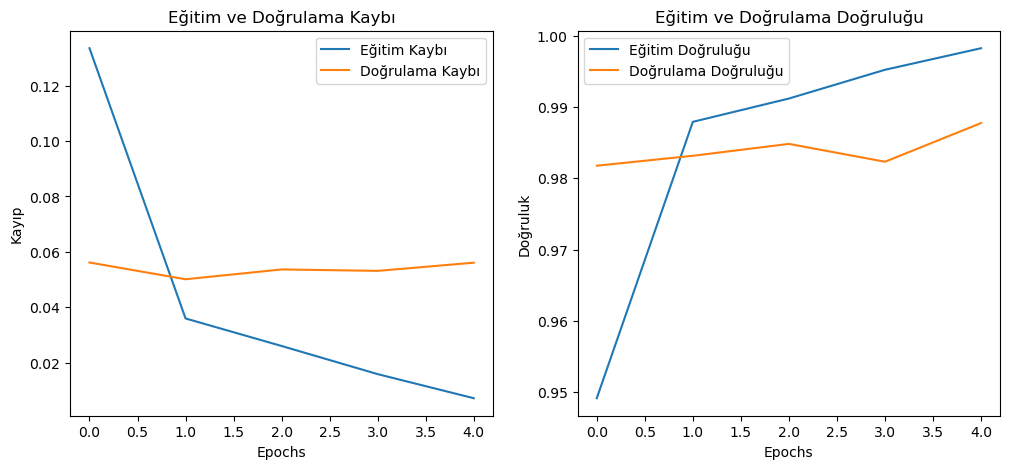

In [22]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()
plt.title('Eğitim ve Doğrulama Kaybı')

# Eğitim ve doğrulama doğruluğu
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Eğitim ve Doğrulama Doğruluğu')

plt.show()

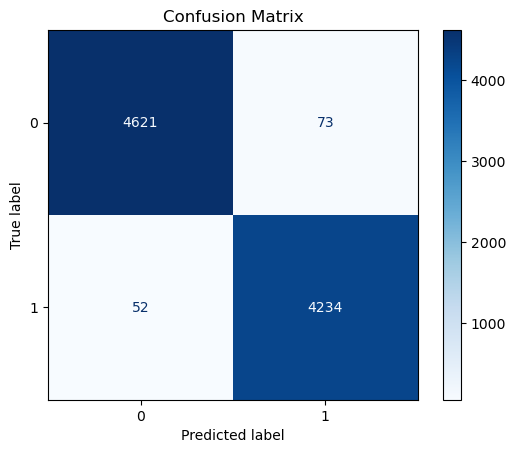

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4694
           1       0.98      0.99      0.99      4286

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [23]:
cm = confusion_matrix(y_test, lstm_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, lstm_predictions))

Naive Bayes

In [ ]:
nb_model = MultinomialNB()

nb_model.fit(xv_train, y_train)
y_pred = nb_model.predict(xv_test)

train_accuracy = nb_model.score(xv_train, y_train)
print(f"Training accuracy: {train_accuracy}")

# Test doğruluğunu hesaplıyoruz
test_accuracy = nb_model.score(xv_test, y_test)
print(f"Test accuracy: {test_accuracy}")


Training accuracy: 0.9432596469736623
Test accuracy: 0.9374164810690423


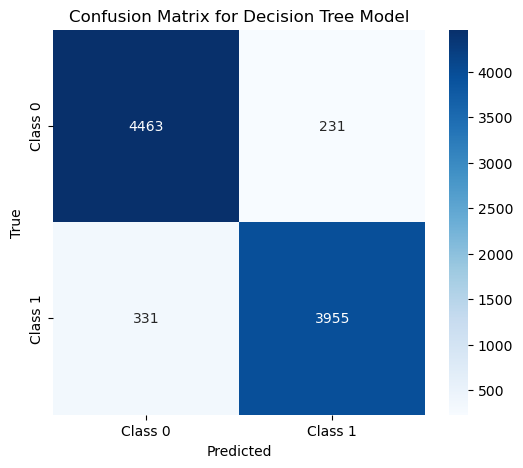

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4694
           1       0.94      0.92      0.93      4286

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [27]:
y_pred = nb_model.predict(xv_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Decision Tree Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test, y_pred))

 %94 doğruluk oranı, genel tahminlerin büyük çoğunluğunun doğru olduğunu ortaya koyuyor. Precision ve Recall değerleri her iki sınıfta da %92-95 arasında değişmekte ve bu, modelin yanlış pozitifleri ve yanlış negatifleri dengeli bir şekilde minimize ettiğini göstermektedir. Ayrıca F1-score değerlerinin yüksek ve dengeli olması, modelin hem sahte hem de gerçek haberleri doğru bir şekilde sınıflandırmada tutarlı bir performans sergilediğini ifade eder. Bu sonuçlarla model, sahte haber tespiti için güvenilir bir araç olarak değerlendirilebilir ve küçük iyileştirmelerle daha da optimize edilebilir.

SVM

In [28]:
svm_model = SVC(kernel='linear')  # Kernel tipini 'linear' seçiyoruz (doğrusal sınıflandırma)
svm_model.fit(xv_train, y_train)

train_accuracy = svm_model.score(xv_train, y_train)
print(f"Training accuracy: {train_accuracy}")

test_accuracy = svm_model.score(xv_test, y_test)
print(f"Test accuracy: {test_accuracy}")

Training accuracy: 0.9982738459825158
Test accuracy: 0.9955456570155902


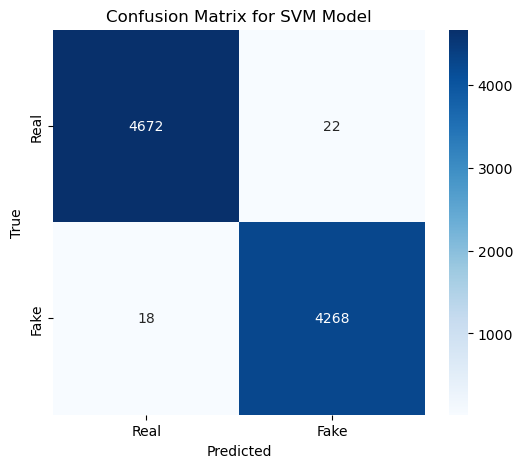

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4694
           1       0.99      1.00      1.00      4286

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [29]:
y_pred = svm_model.predict(xv_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test, y_pred))

SVM modelinin %100 doğruluk ve %100 F1-score gibi mükemmel sonuçları, başlangıçta yüksek bir performans gösterdiği izlenimini uyandırıyor; ancak bu, aynı zamanda overfitting (aşırı uyum) olasılığını da gündeme getiriyor. Modelin eğitim verisine mükemmel uyum sağlıyor olması, test verisinde benzer sonuçlar alınıp alınmadığını test etmeden genellenebilir bir başarı olduğu konusunda yanıltıcı olabilir. 

Logistic Regression

In [32]:
log_reg_model = LogisticRegression() 
log_reg_model.fit(xv_train, y_train)

train_accuracy = log_reg_model.score(xv_train, y_train)
print(f"Training accuracy: {train_accuracy}")

test_accuracy = log_reg_model.score(xv_test, y_test)
print(f"Test accuracy: {test_accuracy}")

Training accuracy: 0.9911743415557659
Test accuracy: 0.9894209354120267


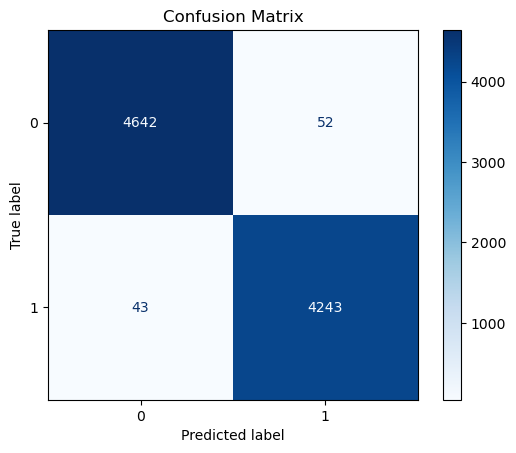

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4694
           1       0.99      0.99      0.99      4286

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [33]:
y_pred_lr = log_reg_model.predict(xv_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

Logistic Regression modelinin sonuçları oldukça başarılı ve dengeli bir performans sergiliyor. %99 doğruluk oranı, modelin genel olarak doğru tahminlerde bulunduğunu gösteriyor. Precision, Recall ve F1-score değerlerinin her iki sınıf için de %99 civarında olması, modelin sahte haberleri ve gerçek haberleri neredeyse mükemmel bir şekilde ayırt edebildiğini ve her iki sınıfı doğru şekilde sınıflandırmada tutarlı olduğunu ortaya koyuyor. Macro ve weighted average değerlerinin %99 olması, modelin sınıflar arasındaki dengesizliği göz önünde bulundurmadan her iki sınıfta da başarılı bir performans sergilediğini ve genelleme yeteneğinin oldukça yüksek olduğunu gösteriyor. Bu sonuçlar, modelin güvenilir bir şekilde sahte haber tespiti yapabileceğini gösteriyor.

LSTM Test

In [35]:
df_manual_test = pd.read_csv("manual_test.csv")

test_text = df_manual_test['text'].iloc[0]
test_seq = pad_sequences(tokenizer.texts_to_sequences([test_text]), maxlen=max_len)

print(f"Test edilen metin:\n{test_text}\n")

prediction = lstm_model.predict(test_seq)

if prediction[0][0] > 0.8:
    print(f"Tahmin: Sahte Haber ({prediction[0][0]:.2f})")
else:
    print(f"Tahmin: Gerçek Haber ({prediction[0][0]:.2f})")

Test edilen metin:
 KILLED: Rancher and protest spokesman Robert  Lavoy  Finicum (Image Source: RT International)21st Century Wire says New eye witness testimony indicates that the FBI and other federal agencies were never fired upon, but have shot and killed leading protester, Robert  Lavoy  Finicum, and wounding one other in a elaborate operation that took place along a rural highway near Burns, Oregon.For 26 days since the protest and occupation began at the Malheur Wildlife Refuge outside of Burns, Oregon there were no one was hurt and there were no injuries. That all changed early Tuesday evening when the FBI and Oregon State Police raised the ante, bringing the 4 week standoff to a dramatic ending.As detailed in yesterday s report, according to 18 yr old passenger and eyewitness, Victoria Sharp, dozens of federal vehicles and armed agents had set-up a pre-positioned roadblocks along an isolated stretch of rural Highway 395 before intercepting two vehicles and firing upon one of t

Naive Bayes Test

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

df_manual_test = pd.read_csv("manual_test.csv")

test_text = df_manual_test['text'].iloc[1] 

print(f"Test edilen metin:\n{test_text}\n")

# Metni modele uygun hale getirmek için CountVectorizer kullanılıyor
vectorizer = CountVectorizer()  # Eğitimde kullanılan vektörizer ile aynı olmalı
vectorizer.fit(x_train)  # Eğitim verileri üzerinde vektörizer'ı eğitiyoruz

# Metni vektörize ediyoruz
test_vector = vectorizer.transform([test_text])

prediction = nb_model.predict(test_vector)

if prediction[0] == 1:
    print("Tahmin: Sahte Haber")
else:
    print("Tahmin: Gerçek Haber")

Test edilen metin:
Tune in to the Alternate Current Radio Network (ACR) for another LIVE broadcast of  The Boiler Room  starting at 6 PM PST | 9 PM EST every Wednesday. Join us for uncensored, uninterruptible talk radio, custom-made for barfly philosophers, misguided moralists, masochists, street corner evangelists, media-maniacs, savants, political animals and otherwise lovable rascals.Join ACR hosts Hesher, & Spore along with Andy Nowicki from Alt Right Blogspot, 21Wire mastermind Patrick Henningsen and Stewart Howe. In this broadcast we re going big time with an extra long overdrive episode, listeners will be hearing us go around the BOILER ROOM on a plethora of topics tonight including  cuddle parties,  a Saudi millionaire running free on rape allegations after claiming to have tripped and fell on victim, Hesher bashes Guns  N Roses, the life span of the iPod about to be ended by a resurgence in tape cassette technology, permaculture farming, federal land grabs, and the demonizatio

SVM Test

In [39]:
df_manual_test = pd.read_csv("manual_test.csv")

test_text = df_manual_test['text'].iloc[2]

print(f"Test edilen metin:\n{test_text}\n")

# Metni modele uygun hale getirmek için CountVectorizer kullanılıyor
vectorizer = CountVectorizer()  # Eğitimde kullanılan vektörizer ile aynı olmalı
vectorizer.fit(x_train)  # Eğitim verileri üzerinde vektörizer'ı eğitiyoruz

# Metni vektörize ediyoruz
test_vector = vectorizer.transform([test_text])

prediction = svm_model.predict(test_vector)

if prediction[0] == 1:
    print("Tahmin: Sahte Haber")
else:
    print("Tahmin: Gerçek Haber")

Test edilen metin:
Patrick Henningsen 21st Century Wire UPDATE: 1-30-2016 Last night, the standoff at Malheur National Wildlife Refuge outside Burns, Oregon took a rather ugly turn which resulted in one man shot dead and another wounded by federal agents.The latest incident took place as two vehicles carrying protesters, led by Ammon Bundy, were en route to a community meeting in the nearby town of John Day in Oregon.According to numerous mainstream media reports and local media outlet Oregon Live,  federal sources  are telling the media that only  3 shots were fired , but a new eye witness testimony by one of the vehicle s passengers tells a very different story.While the mainstream media is still referring to the event as  a shoot-out , according to this latest eye witness account at the scene   no shots were fired by vehicle passengers.According to eyewitness Victoria Sharp, 18 yrs old, from Kansas, who was a passenger in the same truck driven by Arizona rancher Robert  Lavoy  Finic

Logistic Regression Test

In [40]:
df_manual_test = pd.read_csv("manual_test.csv")

test_text = df_manual_test['text'].iloc[3]

print(f"Test edilen metin:\n{test_text}\n")

# Metni modele uygun hale getirmek için CountVectorizer kullanılıyor
vectorizer = CountVectorizer()  # Eğitimde kullanılan vektörizer ile aynı olmalı
vectorizer.fit(x_train)  # Eğitim verileri üzerinde vektörizer'ı eğitiyoruz

# Metni vektörize ediyoruz
test_vector = vectorizer.transform([test_text])

prediction = log_reg_model.predict(test_vector)

if prediction[0] == 1:
    print("Tahmin: Sahte Haber")
else:
    print("Tahmin: Gerçek Haber")

Test edilen metin:
Episode #119 of SUNDAY WIRE SHOW finally resumes this Sunday Jan. 24, 2016 presented by host Patrick Henningsen with 3 HOURS of power-packed talk radio LISTEN LIVE ON THIS PAGE AT THE FOLLOING SCHEDULED SHOW TIMES:SUNDAYS   5pm-8pm UK Time | 12pm-3pm ET (US) | 9am-12pm PT (US)This week s very special edition of THE SUNDAY WIRE is broadcasting LIVE, as host Patrick Henningsen returns this week with another very special show, covering the top news stories internationally. In the first hour we ll look at the latest incarnation of the Litvinenko murder mystery, the upcoming Iowa Caucuses, new reports of MH370 wreckage found in Thailand, as well as the stand-off in Burns, Oregon. In the second hour we re joined by special guest, independent researcher and investigator, Robert Singer, to discuss some new information in the San Bernardino Shooting story. In the third hour we re joined by writer and social commentator Jay Dyer to talk about the wider effects of Mass Shooting

<table border="1">
  <thead>
    <tr>
      <th>Model</th>
      <th>Training Accuracy</th>
      <th>Test Accuracy</th>
      <th>Precision (0)</th>
      <th>Recall (0)</th>
      <th>F1-Score (0)</th>
      <th>Precision (1)</th>
      <th>Recall (1)</th>
      <th>F1-Score (1)</th>
      <th>Macro Avg Precision</th>
      <th>Macro Avg Recall</th>
      <th>Macro Avg F1-Score</th>
      <th>Weighted Avg Precision</th>
      <th>Weighted Avg Recall</th>
      <th>Weighted Avg F1-Score</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>LSTM</td>
      <td>0.9983</td>
      <td>0.9861</td>
      <td>0.99</td>
      <td>0.98</td>
      <td>0.99</td>
      <td>0.98</td>
      <td>0.99</td>
      <td>0.99</td>
      <td>0.99</td>
      <td>0.99</td>
      <td>0.99</td>
      <td>0.99</td>
      <td>0.99</td>
    </tr>
    <tr>
      <td>Naive Bayes</td>
      <td>0.9433</td>
      <td>0.9374</td>
      <td>0.93</td>
      <td>0.95</td>
      <td>0.94</td>
      <td>0.94</td>
      <td>0.92</td>
      <td>0.93</td>
      <td>0.94</td>
      <td>0.94</td>
      <td>0.94</td>
      <td>0.94</td>
      <td>0.94</td>
    </tr>
    <tr>
      <td>SVM</td>
      <td>0.9983</td>
      <td>0.9955</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>0.99</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>1.00</td>
      <td>1.00</td>
    </tr>
    <tr>
      <td>Logistic Regression</td>
      <td>0.9912</td>
      <td>0.9894</td>
      <td>0.99</td>
      <td>0.99</td>
      <td>0.99</td>
      <td>0.99</td>
      <td>0.99</td>
      <td>0.99</td>
      <td>0.99</td>
      <td>0.99</td>
      <td>0.99</td>
      <td>0.99</td>
      <td>0.99</td>
    </tr>
  </tbody>
</table>


LSTM:
LSTM yüksek test doğruluğu gösteriyor (98.61%) ve her iki sınıf için de oldukça iyi precision, recall ve f1-score değerleri sağlıyor. Ancak, LSTM'nin karmaşık bir model olması, işlem gücü ve zaman açısından daha fazla kaynak gerektirebilir.

Naive Bayes:
Naive Bayes, test doğruluğu açısından diğer modellerin gerisinde kalıyor (93.74%). Precision, recall ve f1-score değerleri de LSTM ve diğer modellerin gerisinde. Bu model, daha basit olmasına rağmen genellikle daha düşük performans sunuyor.

SVM:
SVM, mükemmel sonuçlar elde etti (99.55% test doğruluğu). Ancak, yüksek doğruluk ve f1-score değerleri overfitting (aşırı uyum) riski taşıyor olabilir. Eğitim seti üzerinde çok iyi performans gösterse de test seti üzerinde dikkatli bir değerlendirme gerekebilir. Modelin doğruluğuna dikkat edilmesi önemlidir.

Logistic Regression:
Logistic Regression, LSTM ile benzer sonuçlar veriyor (98.94% test doğruluğu). Hem eğitim hem de test verisi üzerinde oldukça dengeli sonuçlar sağlıyor, bu da onu daha sağlam bir seçenek yapıyor.
<hr>
Sonuç:
SVM en yüksek doğruluğu sağlıyor, ancak overfitting riski nedeniyle dikkatli kullanılmalı.
LSTM da yüksek performans gösteriyor, ancak daha karmaşık bir model olması nedeniyle işlem süresi daha uzun olabilir.
Logistic Regression oldukça dengeli ve hızlı bir model olup, iyi bir test doğruluğu sunuyor.
Naive Bayes düşük performansı nedeniyle diğer modellere kıyasla daha az tercih edilebilir.